# Imports

In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import shap
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

# Loading data
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/jiajias_research_project/data/combined_data_laliga.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Features/Preparing Data

In [ ]:
# Data overview
df.head()
print(df.columns)
df.info()
df.describe()

Index(['Unnamed: 0', 'Home Team', 'Away Team', 'Score', 'Half Time Score',
       'Match Excitement', 'Home Team Rating', 'Away Team Rating',
       'Home Team Possession %', 'Away Team Possession %',
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Home Team Goals Scored', 'Away Team Goals Scored

,Unnamed: 0,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
count,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,...,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,1329.500000,5.249023,6.368684,6.045075,51.541729,48.458271,5.532707,4.648496,13.078195,2.912782,...,21.427444,13.770301,2.640977,0.077444,0.048872,1.517669,1.140977,1.140977,1.517669,2017.000000
std,768.020182,1.731189,0.951842,0.949453,11.153892,11.153892,2.696240,2.506880,4.814410,1.997532,...,9.337776,4.166010,1.474126,0.275655,0.224192,1.320161,1.143047,1.143047,1.320161,2.000376
min,0.000000,1.400000,2.800000,3.000000,18.000000,17.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000
25%,664.750000,3.900000,5.700000,5.400000,44.000000,41.000000,4.000000,3.000000,10.000000,1.000000,...,14.000000,11.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2015.000000
50%,1329.500000,5.100000,6.400000,6.000000,52.000000,48.000000,5.000000,4.000000,13.000000,3.000000,...,20.000000,13.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2017.000000
75%,1994.250000,6.300000,6.900000,6.600000,59.000000,56.000000,7.000000,6.000000,16.000000,4.000000,...,27.000000,16.000000,4.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2019.000000
max,2659.000000,10.000000,10.000000,10.000000,83.000000,82.000000,18.000000,17.000000,33.000000,12.000000,...,63.000000,30.000000,8.000000,2.000000,2.000000,10.000000,8.000000,8.000000,10.000000,2020.000000


In [ ]:
# Derived features
df['Possession Difference'] = df['Home Team Possession %'] - df['Away Team Possession %']
df['Clearances Difference'] = df['Home Team Clearances'] - df['Away Team Clearances']
df['On Target Shots Difference'] = df['Home Team On Target Shots'] - df['Away Team On Target Shots']
df['Total Shots Difference'] = df['Home Team Total Shots'] - df['Away Team Total Shots']
df['Blocked Shots Difference'] = df['Home Team Blocked Shots'] - df['Away Team Blocked Shots']
df['Pass Success Difference'] = df['Home Team Pass Success %'] - df['Away Team Pass Success %']
df['Home Team On Target Shot Ratio'] = df['Home Team On Target Shots'] / df['Home Team Total Shots']
df['Away Team On Target Shot Ratio'] = df['Away Team On Target Shots'] / df['Away Team Total Shots']
df['Difference in On Target Shot Ratio'] = df['Home Team On Target Shot Ratio'] - df['Away Team On Target Shot Ratio']
df['totalShots'] = df['Home Team Blocked Shots'] + df['Away Team Blocked Shots']
df['blockRatio'] = df['Home Team Blocked Shots'] / df['totalShots']
df['clearDif'] = df['Home Team On Target Shots'] / df['totalShots']

In [ ]:
# Selecting features/target for prediction
features = ['Possession Difference', 'Home Team Possession %',
            'Home Team On Target Shots', 'Home Team Total Shots', 'Away Team Total Shots',
            'Home Team Clearances', 'Away Team Clearances', 'Home Team Pass Success %',
            'Away Team On Target Shots', 'Blocked Shots Difference',
            'Away Team Pass Success %', 'Pass Success Difference', 'Clearances Difference', 'On Target Shots Difference', #'year', 'Clearances Difference'
            ]
target = 'Score'

X = df[features]
y = df[target]

In [ ]:
# Converting the Score column - which is a string - into numerical values

# Splitting the Score column into Home Goals and Away Goals
df[['Home Goals', 'Away Goals']] = df['Score'].str.split('-', expand=True).astype(int)

# 1 for Home Win, 0 for Draw or Loss
y = (df['Home Goals'] > df['Away Goals']).astype(int)

# confirming the above
print("Unique y labels:", np.unique(y))


Unique y labels: [0 1]


In [ ]:
#Splitting the data into training/validation/test sets
ss_split = StratifiedShuffleSplit(n_splits=1, test_size=0.10, random_state=42)
train_valid_index, test_index = next(ss_split.split(X, y))

X_train_valid, X_test = X.iloc[train_valid_index], X.iloc[test_index]
y_train_valid, y_test = y.iloc[train_valid_index], y.iloc[test_index]

# Splitting the training/validation set into train\ing and validation sets
ss_split = StratifiedShuffleSplit(n_splits=1, test_size=0.10, random_state=42)
train_index, valid_index = next(ss_split.split(X_train_valid, y_train_valid))

X_train, X_valid = X_train_valid.iloc[train_index], X_train_valid.iloc[valid_index]
y_train, y_valid = y_train_valid.iloc[train_index], y_train_valid.iloc[valid_index]

In [ ]:
# Standardizing features
x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)


X_train_std = (X_train - x_mean) / x_std
X_valid_std = (X_valid - x_mean) / x_std
X_test_std  = (X_test  - x_mean) / x_std

In [ ]:
# The data is standardized within the pipeline in cell hq8Bn2mLA2Pu
# X_train_std.shape, X_valid_std.shape, X_test_std.shape # These variables are not defined

In [ ]:
# Number of entries by set
X_train_std.shape, X_valid_std.shape, X_test_std.shape

((2154, 14), (240, 14), (266, 14))

# Random Forest Model

In [ ]:
# Hyperparameter Tuning

param_grid = {
    'n_estimators': [100, 200],       # Amount of trees
    'max_depth': [1, 5, 10],       # Depth of each tree
  #  'min_samples_split': [1, 2],
    'min_samples_leaf': [1, 2],              # Leaf size (reduces overfitting)
  #  'max_features': ['sqrt', 'log2'],     # Tries all valid regression options
    'bootstrap': [True, False],                  # Whether bootstrap samples are used when building trees
}



In [ ]:
# Training model
grid_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_grid, cv=3, scoring='accuracy', n_jobs=-1, n_iter=20, random_state=42)

# Fit to training data
grid_search.fit(X_train_std, y_train)

# Find the best params/estimators
print("Best params:", grid_search.best_params_)

Best params: {'n_estimators': 200, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': True}


In [ ]:
# Prediction/evaluation on training set
y_predtrain = grid_search.predict(X_train_std)
print("Classification Report for Training Set: \n")
print(classification_report(y_train, y_predtrain))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_predtrain))

# Prediction/evaluation on validation set
y_predvalid = grid_search.predict(X_valid_std)
print("\nClassification Report for Validation Set: \n")
print(classification_report(y_valid, y_predvalid))
print("\nConfusion Matrix:\n", confusion_matrix(y_valid, y_predvalid))


# Prediction/evaluation on testing set
y_predtest = grid_search.predict(X_test_std)
print("\nClassification Report for Test Set: \n")
print(classification_report(y_test, y_predtest))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predtest))

Classification Report for Training Set: 

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1171
           1       0.79      0.74      0.76       983

    accuracy                           0.79      2154
   macro avg       0.79      0.78      0.79      2154
weighted avg       0.79      0.79      0.79      2154


Confusion Matrix:
 [[972 199]
 [256 727]]

Classification Report for Validation Set: 

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       130
           1       0.74      0.71      0.72       110

    accuracy                           0.75       240
   macro avg       0.75      0.75      0.75       240
weighted avg       0.75      0.75      0.75       240


Confusion Matrix:
 [[102  28]
 [ 32  78]]

Classification Report for Test Set: 

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       145
           1       0.76  

In [ ]:
# Threshold tuning
# Get predicted probabilities on validation set
y_valid_probs = grid_search.predict_proba(X_valid_std)[:, 1]

# Find optimal threshold
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_probs)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"\n Optimal threshold based on validation ROC: {optimal_threshold:.3f}")

# Make new predictions on validation set using the custom threshold
y_valid_thresh = (y_valid_probs >= optimal_threshold).astype(int)

# Evaluate threshold-tuned predictions
print("\n Classification Report with Threshold Tuning Validation Set:")
print(classification_report(y_valid, y_valid_thresh))
print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_valid_thresh))

# Make new predictions on testing set using the custom threshold
y_test_probs = grid_search.predict_proba(X_test_std)[:, 1]
y_test_thresh = (y_test_probs >= optimal_threshold).astype(int)

print("\n Classification Report with Threshold Tuning for Test Set:")
print(classification_report(y_test, y_test_thresh))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_thresh))


 Optimal threshold based on validation ROC: 0.458

 Classification Report with Threshold Tuning Validation Set:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       130
           1       0.74      0.79      0.76       110

    accuracy                           0.78       240
   macro avg       0.77      0.78      0.77       240
weighted avg       0.78      0.78      0.78       240


Confusion Matrix:
[[99 31]
 [23 87]]

 Classification Report with Threshold Tuning for Test Set:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       145
           1       0.76      0.76      0.76       121

    accuracy                           0.78       266
   macro avg       0.78      0.78      0.78       266
weighted avg       0.78      0.78      0.78       266

Confusion Matrix:
[[116  29]
 [ 29  92]]


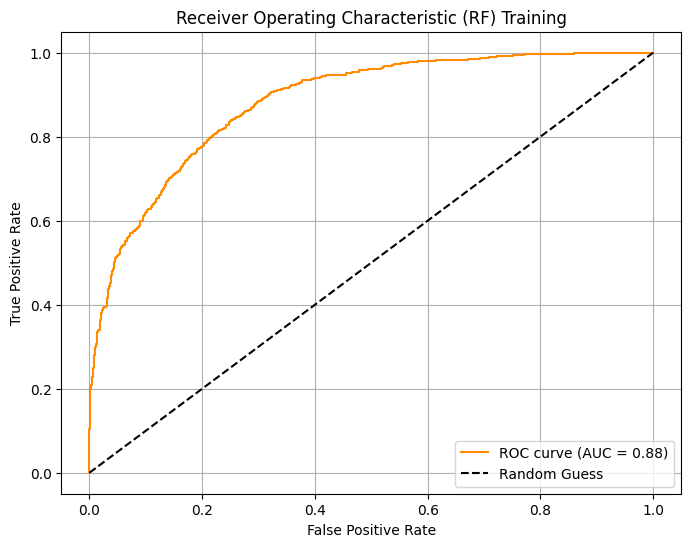

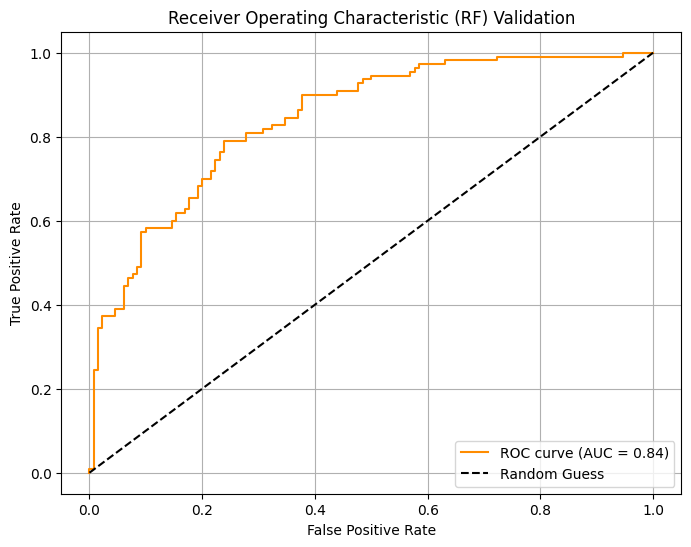

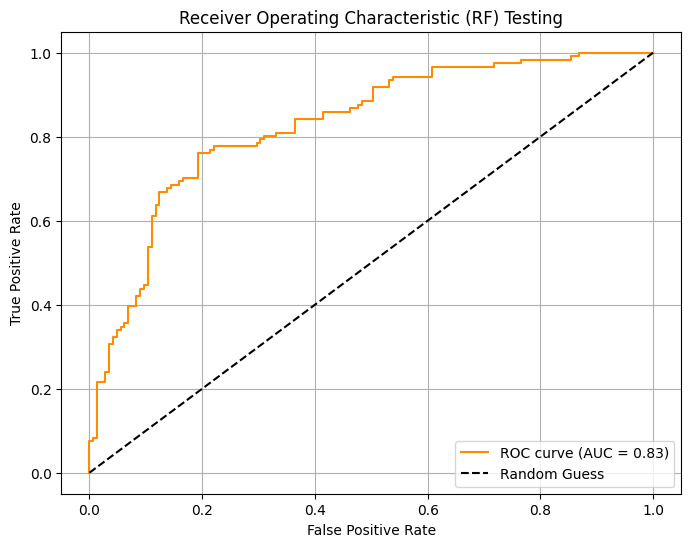

In [ ]:
# ROC curve for Random Forest model

#Training
y_scorestr = grid_search.predict_proba(X_train_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_scorestr)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF) Training')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#Validation
y_scoresv = grid_search.predict_proba(X_valid_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, y_scoresv)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF) Validation')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Testing
y_scoreste = grid_search.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scoreste)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF) Testing')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

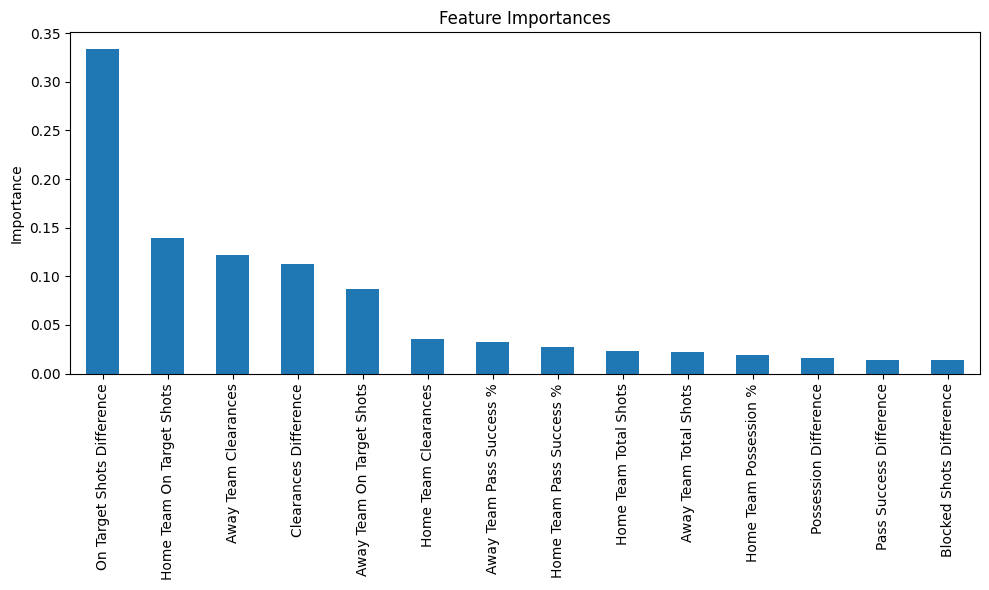

In [ ]:
# Evaluating feature importance
importances = grid_search.best_estimator_.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

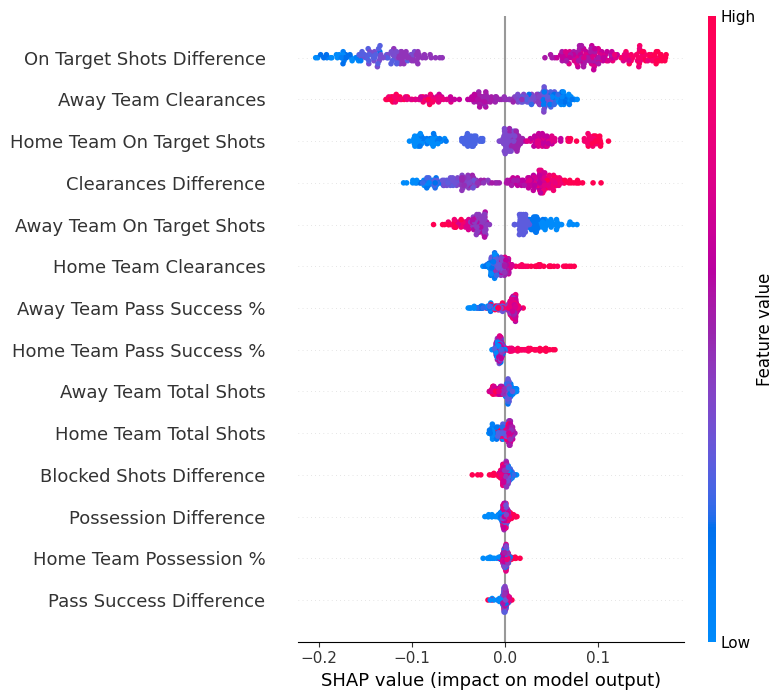

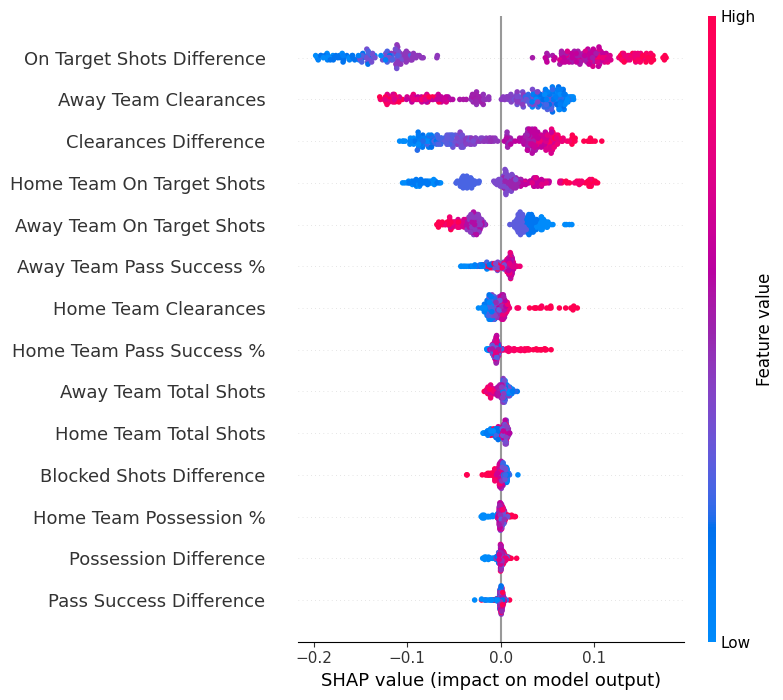

In [ ]:
best_model = grid_search.best_estimator_
explainer = shap.Explainer(best_model)

# Shap for validation set
shap_values_val = explainer(X_valid_std)
shap.summary_plot(shap_values_val.values[:,:,1], X_valid_std, feature_names=feature_names)

# Shap for testing set
shap_values_test = explainer(X_test_std)
shap.summary_plot(shap_values_test.values[:,:,1], X_test_std, feature_names=feature_names)


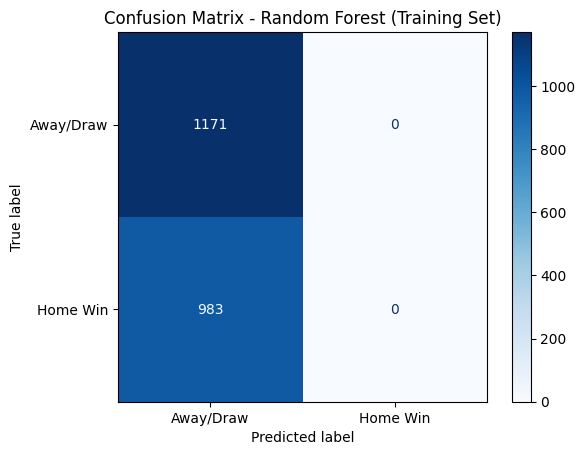

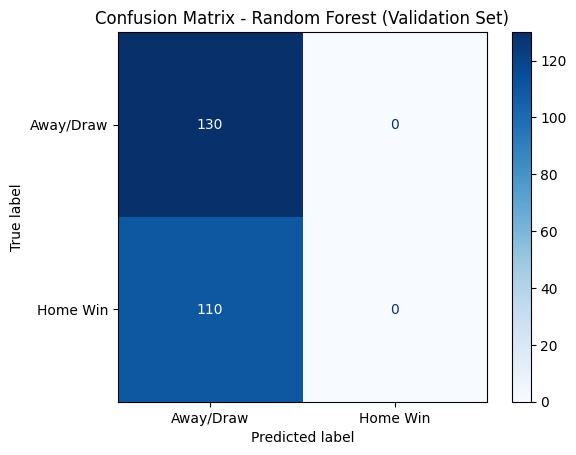

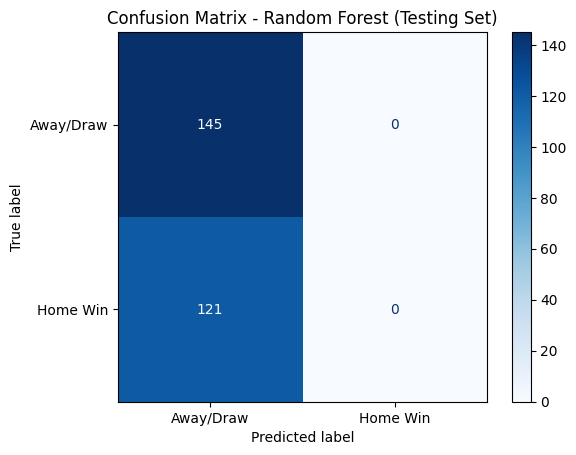

In [ ]:
# Confusion Matrix for Random Forest

display_labels = ['Away/Draw', 'Home Win']
ConfusionMatrixDisplay.from_predictions(
    y_train,
    y_predtrain,
    display_labels=display_labels,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix - Random Forest (Training Set)')
plt.show()

display_labels = ['Away/Draw', 'Home Win']
ConfusionMatrixDisplay.from_predictions(
    y_valid,
    y_predvalid,
    display_labels=display_labels,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix - Random Forest (Validation Set)')
plt.show()

display_labels = ['Away/Draw', 'Home Win']
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_predtest,
    display_labels=display_labels,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix - Random Forest (Testing Set)')
plt.show()

# Gradient Boosting Classifier

In [ ]:
# Hyperparameter Tuning
param_grid_gb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [300, 400, 500],
    'max_depth': [2, 3, 4],
   # 'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
   # 'subsample': [0.8, 1.0]
}

In [ ]:
# Training Model
gb_clf = GradientBoostingClassifier(random_state=42)
grid_search_gb = RandomizedSearchCV(gb_clf, param_grid_gb, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit to training data
grid_search_gb.fit(X_train_std, y_train)

# Find the best params/estimators
print("Best parameters:", grid_search_gb.best_params_)
print("Best cross-validation accuracy:", grid_search_gb.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 500, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.01}
Best cross-validation accuracy: 0.7493036211699163


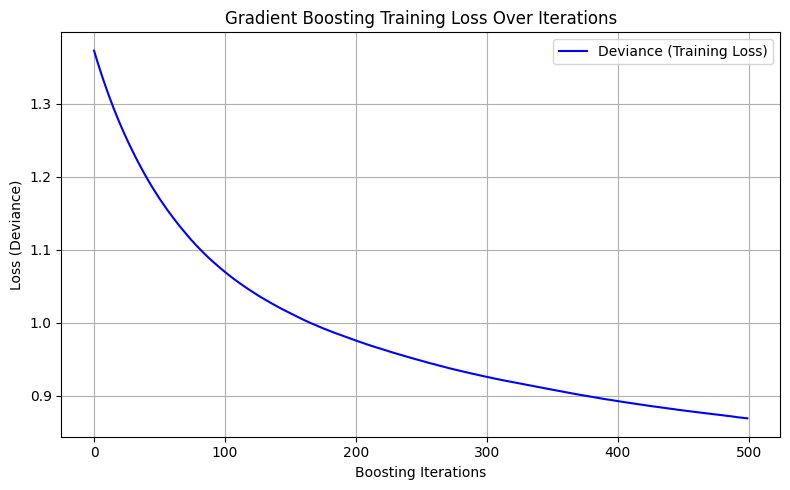

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss over iterations
plt.figure(figsize=(8, 5))
# Access the best estimator from grid_search_gb
plt.plot(grid_search_gb.best_estimator_.train_score_, label='Deviance (Training Loss)', color='blue')
plt.xlabel('Boosting Iterations')
plt.ylabel('Loss (Deviance)')
plt.title('Gradient Boosting Training Loss Over Iterations')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Prediction/evaluation on training set
y_predtrain1 = grid_search_gb.best_estimator_.predict(X_train_std)
print("Classification Report for Training Set: \n")
print(classification_report(y_train, y_predtrain1))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_predtrain1))

# Prediction/evaluation on validation set
y_predvalid1 = grid_search_gb.best_estimator_.predict(X_valid_std)
print("\nClassification Report for Validation Set: \n")
print(classification_report(y_valid, y_predvalid1))
print("\nConfusion Matrix:\n", confusion_matrix(y_valid, y_valid_thresh)) # Changed y_predvalid1 to y_valid_thresh based on previous cell

# Prediction/evaluation on testing set
y_predtest1 = grid_search_gb.best_estimator_.predict(X_test_std)
print("\nClassification Report for Test Set: \n")
print(classification_report(y_test, y_predtest1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_thresh)) # Changed y_predtest1 to y_test_thresh based on previous cell

Classification Report for Training Set: 

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1171
           1       0.78      0.77      0.78       983

    accuracy                           0.80      2154
   macro avg       0.80      0.79      0.80      2154
weighted avg       0.80      0.80      0.80      2154


Confusion Matrix:
 [[960 211]
 [226 757]]

Classification Report for Validation Set: 

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       130
           1       0.74      0.74      0.74       110

    accuracy                           0.76       240
   macro avg       0.76      0.76      0.76       240
weighted avg       0.76      0.76      0.76       240


Confusion Matrix:
 [[99 31]
 [23 87]]

Classification Report for Test Set: 

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       145
           1       0.77      

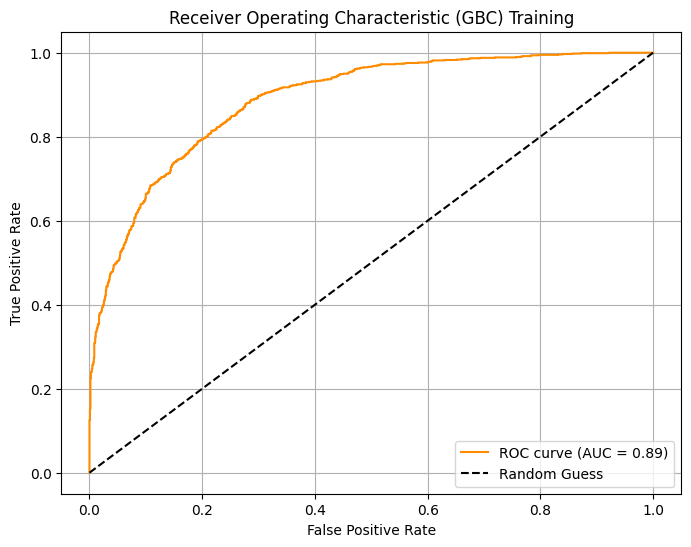

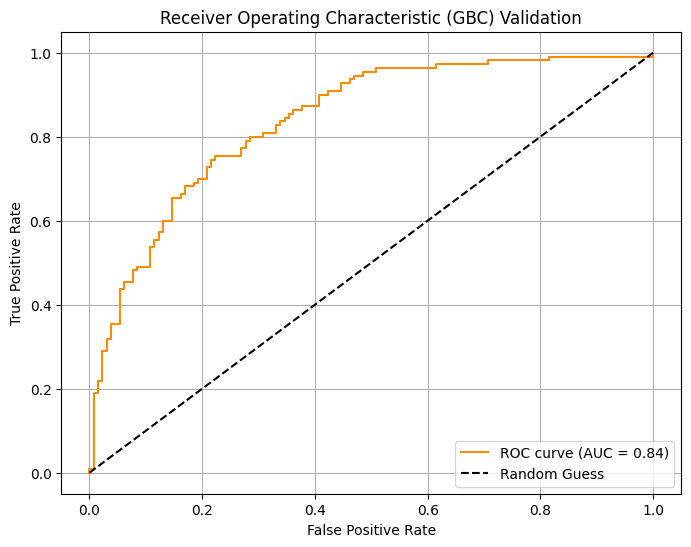

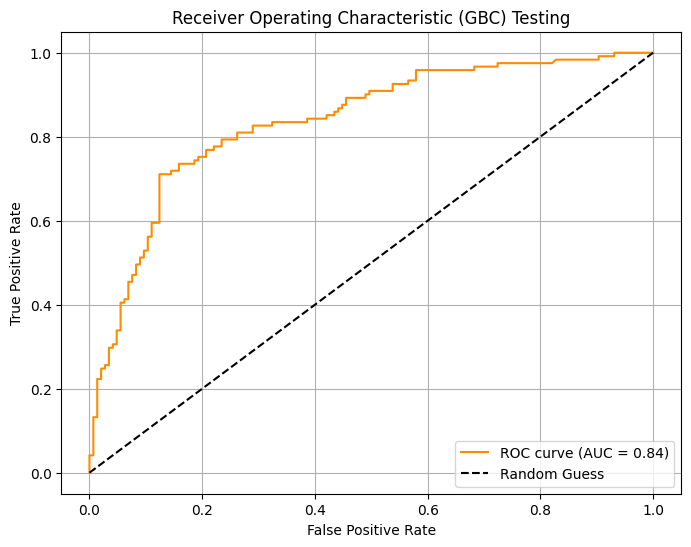

In [ ]:
# ROC curve for Gradient Boosting Classifier

# Training
y_scorestr1 = grid_search_gb.best_estimator_.predict_proba(X_train_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_scorestr1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GBC) Training') # Added "Training" to title
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Validation
y_scoresv1 = grid_search_gb.best_estimator_.predict_proba(X_valid_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, y_scoresv1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GBC) Validation') # Added "Validation" to title
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Testing
y_scoreste1 = grid_search_gb.best_estimator_.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scoreste1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GBC) Testing') # Added "Testing" to title
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

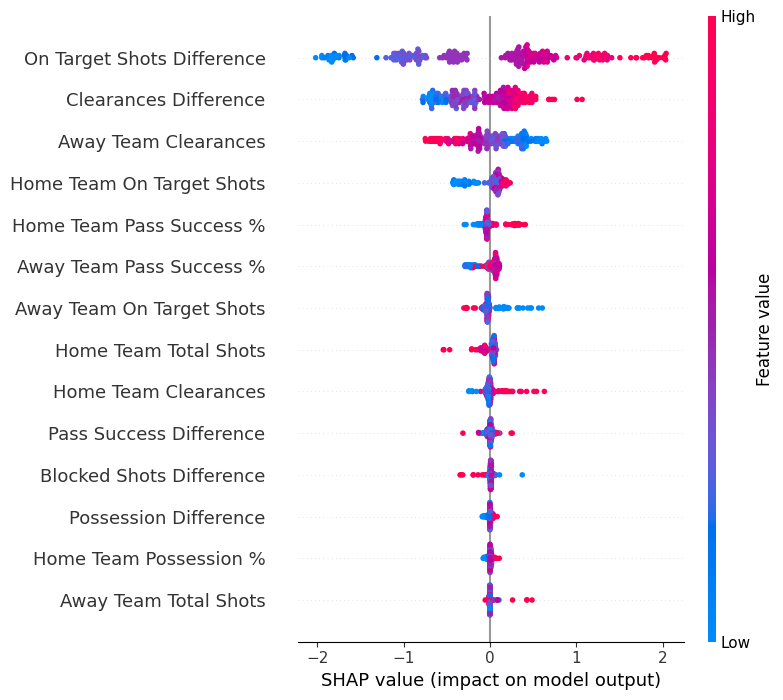

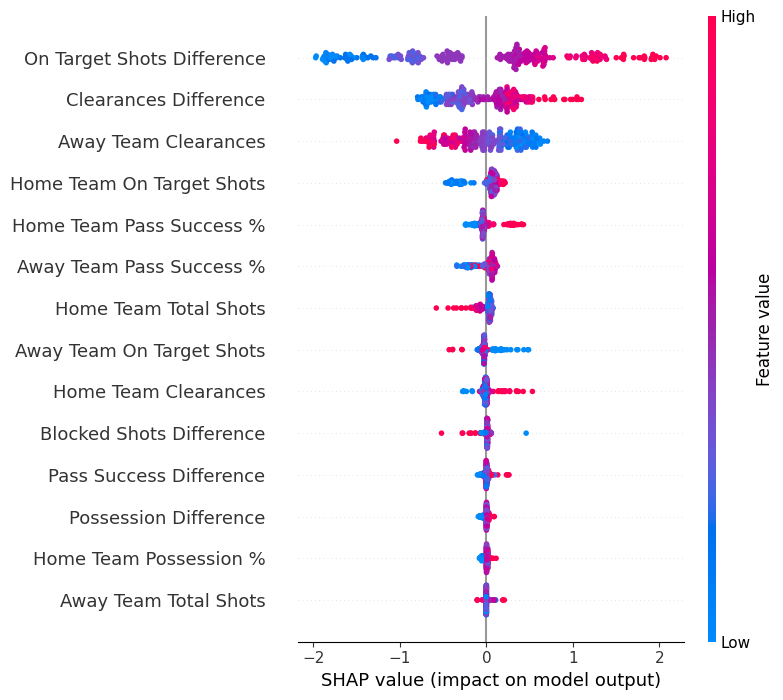

In [ ]:
explainer = shap.Explainer(grid_search_gb.best_estimator_)

# Shap for validation set
shap_values_val = explainer(X_valid_std)
shap.summary_plot(shap_values_val.values, X_valid_std, feature_names=feature_names)

# Shap for test set
shap_values_test = explainer(X_test_std)
shap.summary_plot(shap_values_test.values, X_test_std, feature_names=feature_names)

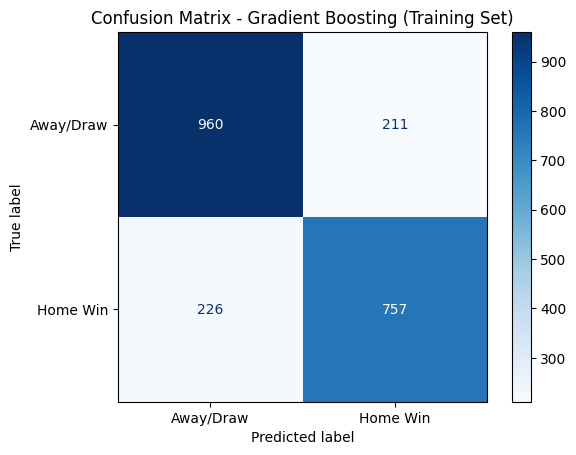

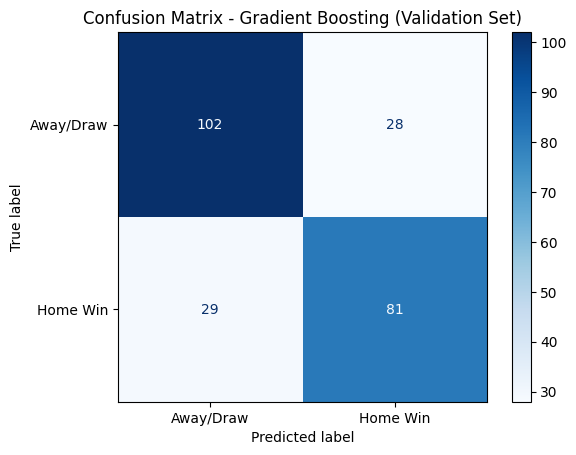

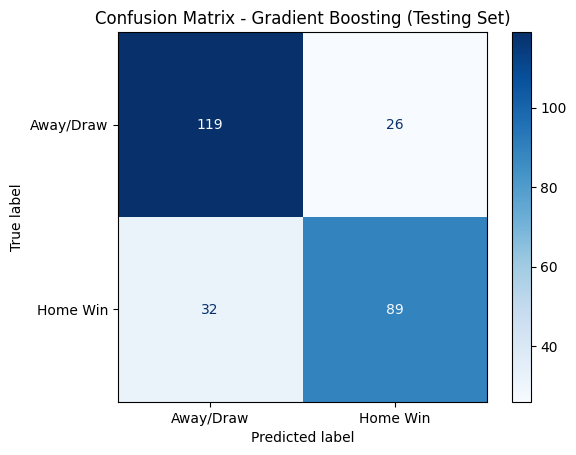

In [ ]:
# Confusion Matrix for GB Classifier

display_labels = ['Away/Draw', 'Home Win']
ConfusionMatrixDisplay.from_predictions(
    y_train,
    y_predtrain1,
    display_labels=display_labels,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix - Gradient Boosting (Training Set)')
plt.show()

display_labels = ['Away/Draw', 'Home Win']
ConfusionMatrixDisplay.from_predictions(
    y_valid,
    y_predvalid1,
    display_labels=display_labels,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix - Gradient Boosting (Validation Set)')
plt.show()

display_labels = ['Away/Draw', 'Home Win']
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_predtest1,
    display_labels=display_labels,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix - Gradient Boosting (Testing Set)')
plt.show()

# SVM

this one is like lowkey shit though...

In [ ]:
param_gridsvm = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 0.01, 0.001]
}


# GridSearchCV with pipeline
grid = GridSearchCV(
    make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True)),
    param_gridsvm,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Fit to training data
grid.fit(X_train, y_train)

# Get the best model (already fitted)
best_svm = grid.best_estimator_

# Evaluate
print("Best parameters:", grid.best_params_)

Best parameters: {'svc__C': 0.1, 'svc__gamma': 'scale'}


In [ ]:
# Prediction/evaluation on training set
y_predtrain = best_svm.predict(X_train_std)
print("Classification Report for Training Set: \n")
print(classification_report(y_train, y_predtrain))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_predtrain))

# Prediction/evaluation on validation set
y_predvalid = best_svm.predict(X_valid_std)
print("\nClassification Report for Validation Set: \n")
print(classification_report(y_valid, y_predvalid))
print("\nConfusion Matrix:\n", confusion_matrix(y_valid, y_predvalid))


# Prediction/evaluation on testing set
y_predtest = best_svm.predict(X_test_std)
print("\nClassification Report for Test Set: \n")
print(classification_report(y_test, y_predtest))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predtest))

Classification Report for Training Set: 

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1171
           1       0.00      0.00      0.00       983

    accuracy                           0.54      2154
   macro avg       0.27      0.50      0.35      2154
weighted avg       0.30      0.54      0.38      2154


Confusion Matrix:
 [[1171    0]
 [ 983    0]]

Classification Report for Validation Set: 

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       130
           1       0.00      0.00      0.00       110

    accuracy                           0.54       240
   macro avg       0.27      0.50      0.35       240
weighted avg       0.29      0.54      0.38       240


Confusion Matrix:
 [[130   0]
 [110   0]]

Classification Report for Test Set: 

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       145
           1       0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# SGD Classifier

In [ ]:
# Train SGD Classifier
sgd_clf = SGDClassifier(random_state=42, loss='log_loss')
sgd_clf.fit(X_train_std, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [ ]:
# Prediction/evaluation on training set
y_predtrain_sgd = sgd_clf.predict(X_train_std)
print("Classification Report for SGD (Training Set): \n")
print(classification_report(y_train, y_predtrain_sgd))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_predtrain_sgd))

# Prediction/evaluation on validation set
y_predvalid_sgd = sgd_clf.predict(X_valid_std)
print("\nClassification Report for SGD (Validation Set): \n")
print(classification_report(y_valid, y_predvalid_sgd))
print("\nConfusion Matrix:\n", confusion_matrix(y_valid, y_predvalid_sgd))

# Prediction/evaluation on testing set
y_predtest_sgd = sgd_clf.predict(X_test_std)
print("\nClassification Report for SGD (Test Set): \n")
print(classification_report(y_test, y_predtest_sgd))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predtest_sgd))

Classification Report for SGD (Training Set): 

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1171
           1       0.76      0.67      0.71       983

    accuracy                           0.75      2154
   macro avg       0.75      0.75      0.75      2154
weighted avg       0.75      0.75      0.75      2154


Confusion Matrix:
 [[961 210]
 [321 662]]

Classification Report for SGD (Validation Set): 

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       130
           1       0.74      0.66      0.70       110

    accuracy                           0.74       240
   macro avg       0.74      0.73      0.73       240
weighted avg       0.74      0.74      0.74       240


Confusion Matrix:
 [[104  26]
 [ 37  73]]

Classification Report for SGD (Test Set): 

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       145
       

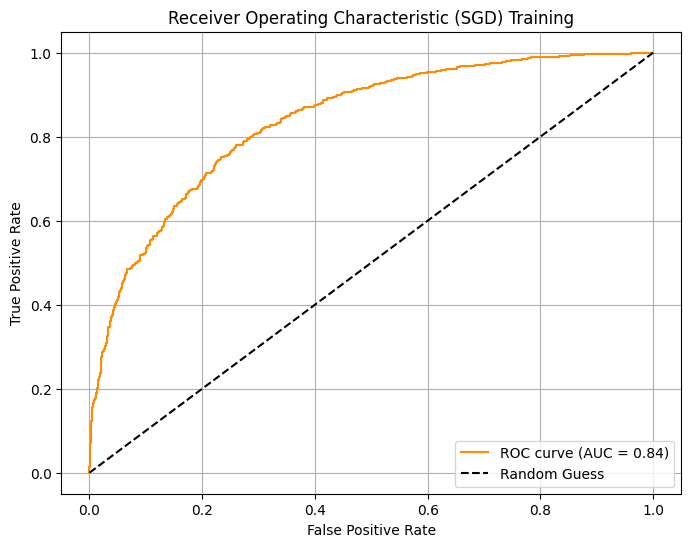

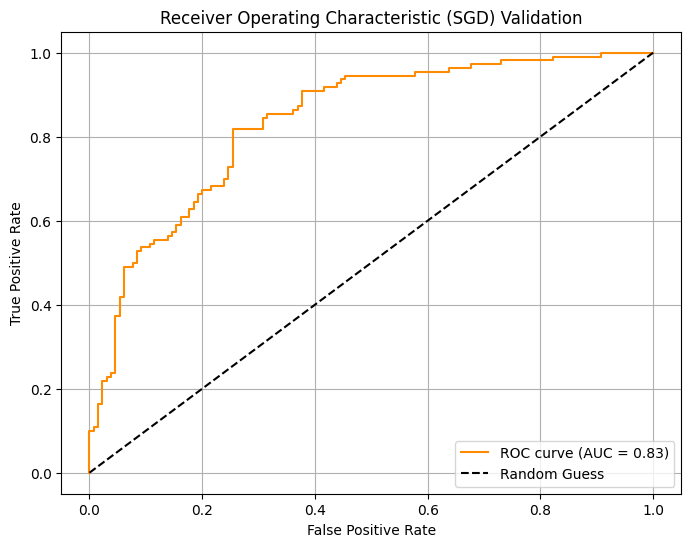

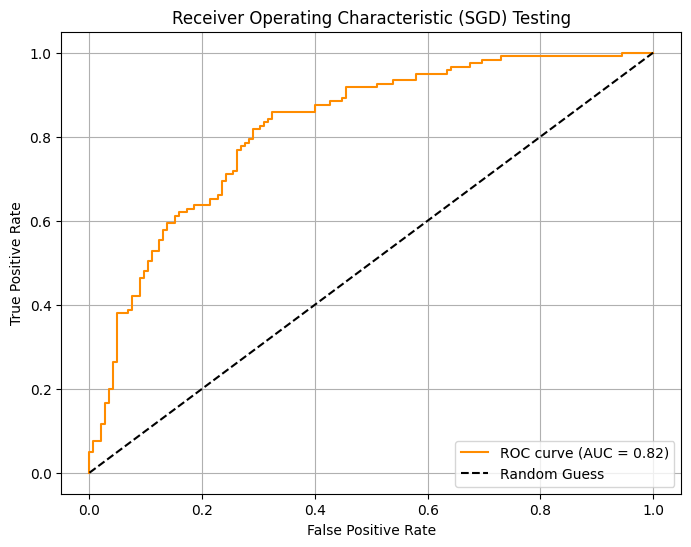

In [ ]:
# ROC curve for SGD Classifier

# Training
y_scorestr = sgd_clf.predict_proba(X_train_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_scorestr)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SGD) Training')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Validation
y_scoresv = sgd_clf.predict_proba(X_valid_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, y_scoresv)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SGD) Validation')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Testing
y_scoreste = sgd_clf.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scoreste)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SGD) Testing')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

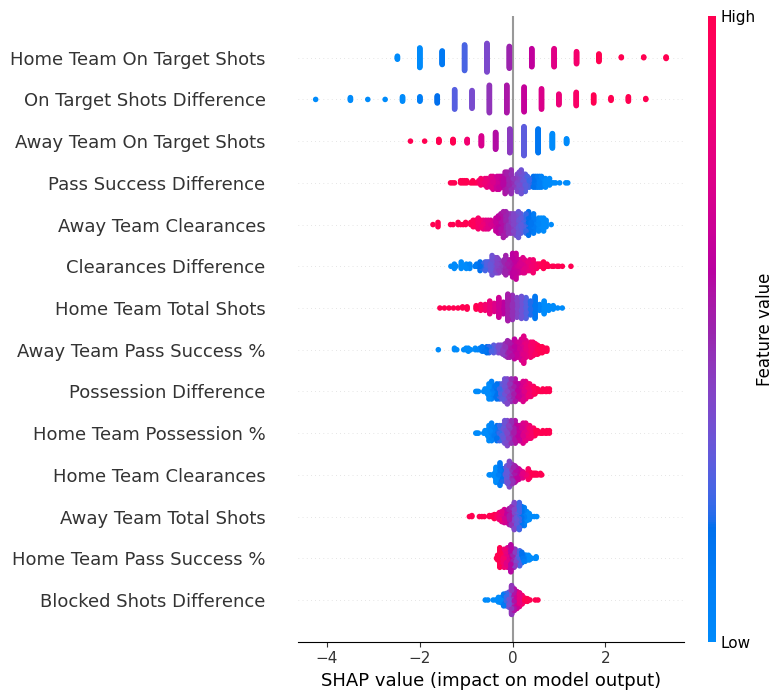

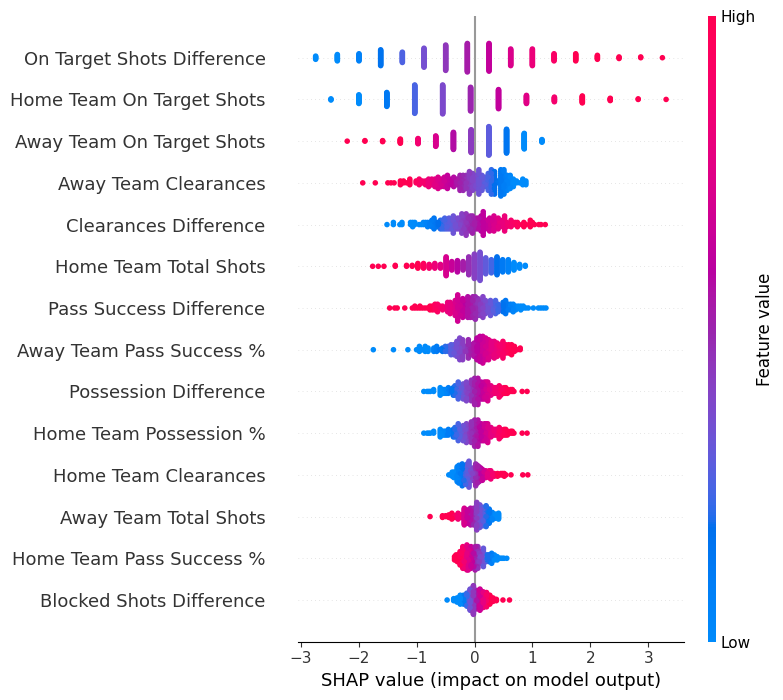

In [ ]:
explainer = shap.LinearExplainer(sgd_clf, X_train_std)

# Shap for validation set
shap_values_val = explainer(X_valid_std)
shap.summary_plot(shap_values_val.values, X_valid_std, feature_names=feature_names)

# Shap for test set
shap_values_test = explainer(X_test_std)
shap.summary_plot(shap_values_test.values, X_test_std, feature_names=feature_names)

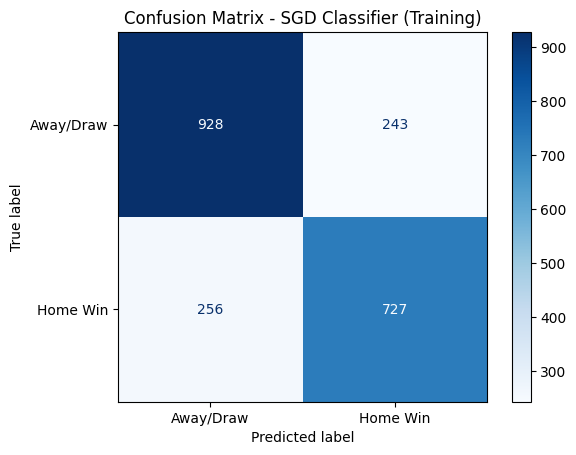

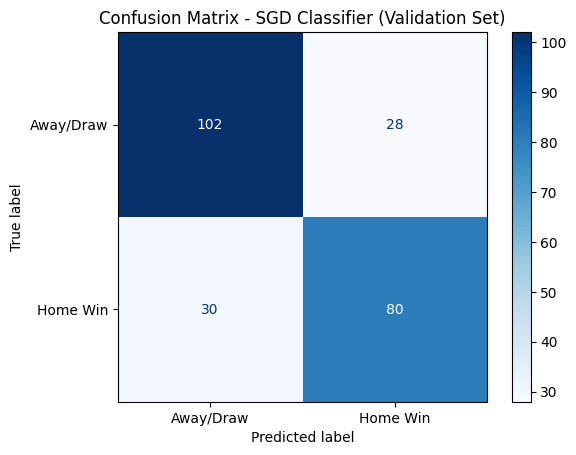

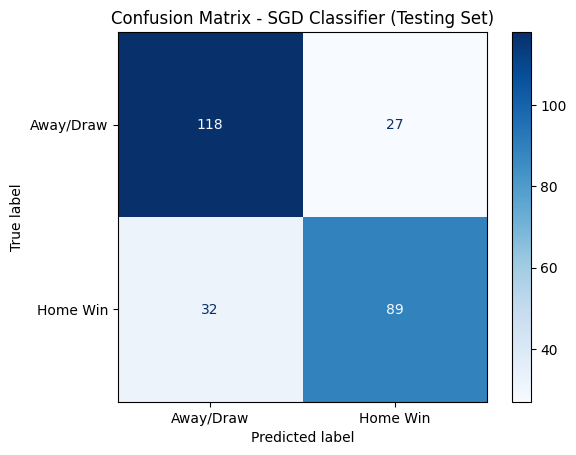

In [ ]:
# Confusion Matrix for SGD

display_labels = ['Away/Draw', 'Home Win']
ConfusionMatrixDisplay.from_predictions(
    y_train,
    y_predtrain_sgd,
    display_labels=display_labels,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix - SGD Classifier (Training)')
plt.show()

display_labels = ['Away/Draw', 'Home Win']
ConfusionMatrixDisplay.from_predictions(
    y_valid,
    y_predvalid_sgd,
    display_labels=display_labels,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix - SGD Classifier (Validation Set)')
plt.show()

display_labels = ['Away/Draw', 'Home Win']
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_predtest_sgd,
    display_labels=display_labels,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix - SGD Classifier (Testing Set)')
plt.show()

# MLP Model (Neural Network)

In [ ]:
# Feature standardiation
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Define the MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),   # Two hidden layers: 50 and 25 neurons
    activation='relu',             # Activation function
    solver='adam',                 # Optimizer
    alpha=0.001,                   # L2 regularization
    max_iter=500,                  # More iterations
    early_stopping=True,          # Stop if validation score doesn’t improve
    random_state=42,
    verbose=True                   # See convergence progress
)

# Training the model
mlp.fit(X_train_std, y_train)


Iteration 1, loss = 0.70070846
Validation score: 0.634259
Iteration 2, loss = 0.63600562
Validation score: 0.671296
Iteration 3, loss = 0.58207599
Validation score: 0.689815
Iteration 4, loss = 0.54023592
Validation score: 0.689815
Iteration 5, loss = 0.51008888
Validation score: 0.722222
Iteration 6, loss = 0.49195961
Validation score: 0.731481
Iteration 7, loss = 0.48051656
Validation score: 0.731481
Iteration 8, loss = 0.47500725
Validation score: 0.731481
Iteration 9, loss = 0.47189557
Validation score: 0.726852
Iteration 10, loss = 0.46903239
Validation score: 0.740741
Iteration 11, loss = 0.46646746
Validation score: 0.726852
Iteration 12, loss = 0.46477069
Validation score: 0.726852
Iteration 13, loss = 0.46344704
Validation score: 0.731481
Iteration 14, loss = 0.46207618
Validation score: 0.736111
Iteration 15, loss = 0.46067768
Validation score: 0.726852
Iteration 16, loss = 0.45992733
Validation score: 0.726852
Iteration 17, loss = 0.45837857
Validation score: 0.736111
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(50, 25),
              max_iter=500, random_state=42, verbose=True)

In [ ]:
# Prediction/evaluation on training set
y_predtrain_mlp = mlp.predict(X_train_std)
print("Classification Report for SGD (Training Set): \n")
print(classification_report(y_train, y_predtrain_mlp))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_predtrain_mlp))

# Prediction/evaluation on validation set
y_predvalid_mlp = mlp.predict(X_valid_std)
print("\nClassification Report for SGD (Validation Set): \n")
print(classification_report(y_valid, y_predvalid_mlp))
print("\nConfusion Matrix:\n", confusion_matrix(y_valid, y_predvalid_mlp))

# Prediction/evaluation on testing set
y_predtest_mlp = mlp.predict(X_test_std)
print("\nClassification Report for SGD (Test Set): \n")
print(classification_report(y_test, y_predtest_mlp))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predtest_mlp))

Classification Report for SGD (Training Set): 

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1171
           1       0.75      0.74      0.74       983

    accuracy                           0.77      2154
   macro avg       0.77      0.77      0.77      2154
weighted avg       0.77      0.77      0.77      2154


Confusion Matrix:
 [[928 243]
 [256 727]]

Classification Report for SGD (Validation Set): 

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       130
           1       0.74      0.73      0.73       110

    accuracy                           0.76       240
   macro avg       0.76      0.76      0.76       240
weighted avg       0.76      0.76      0.76       240


Confusion Matrix:
 [[102  28]
 [ 30  80]]

Classification Report for SGD (Test Set): 

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       145
       

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


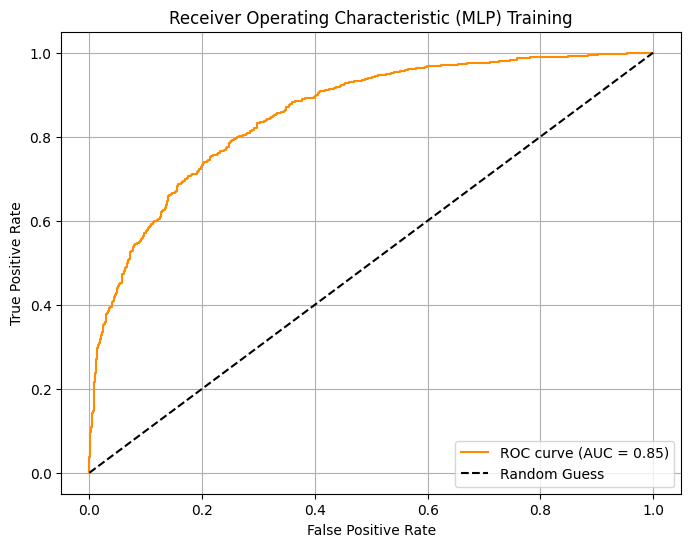

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


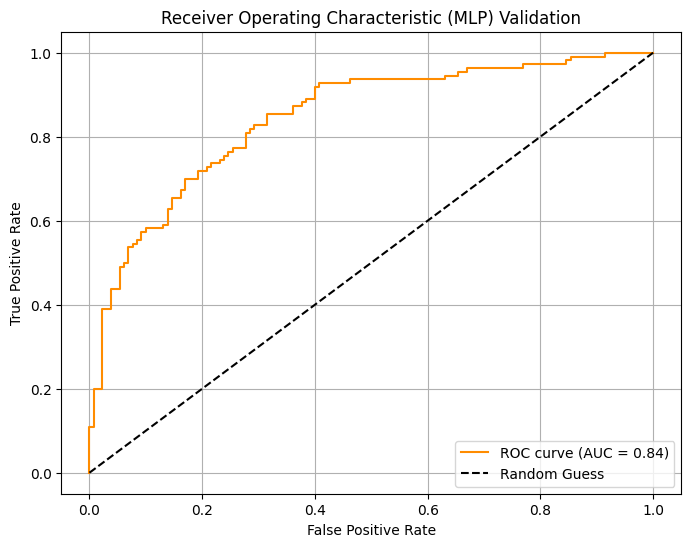

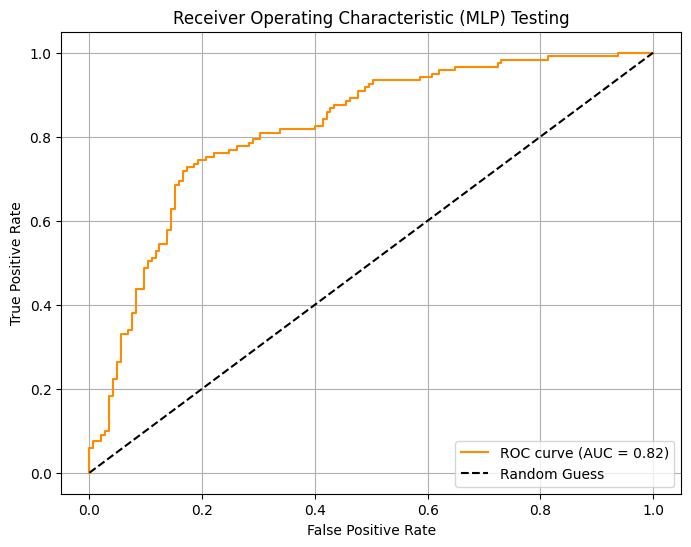

In [ ]:
# ROC curve for MLP Model

#Training
y_scorestr = mlp.predict_proba(X_train_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_scorestr)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (MLP) Training')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#Validation
y_scoresv = mlp.predict_proba(X_valid_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, y_scoresv)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (MLP) Validation')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Testing
y_scoreste = mlp.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scoreste)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (MLP) Testing')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

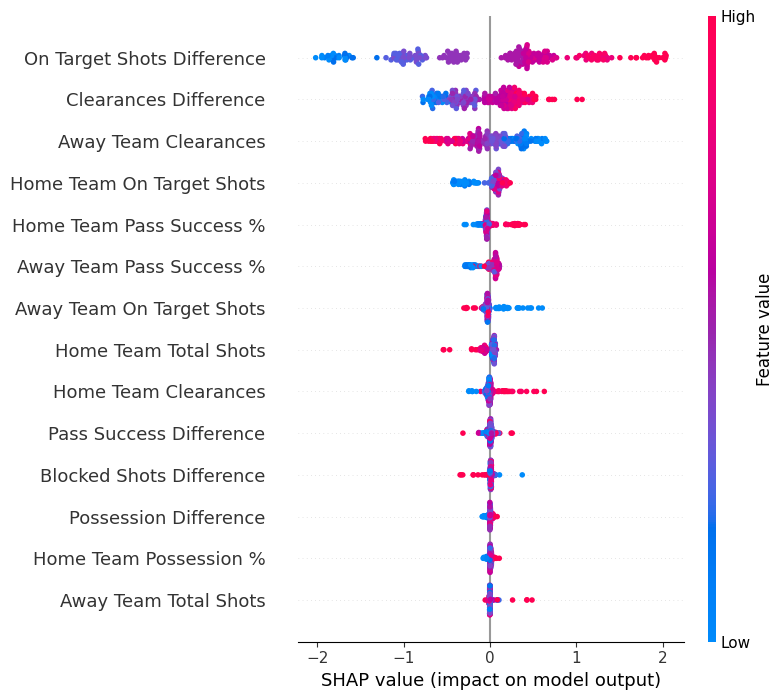

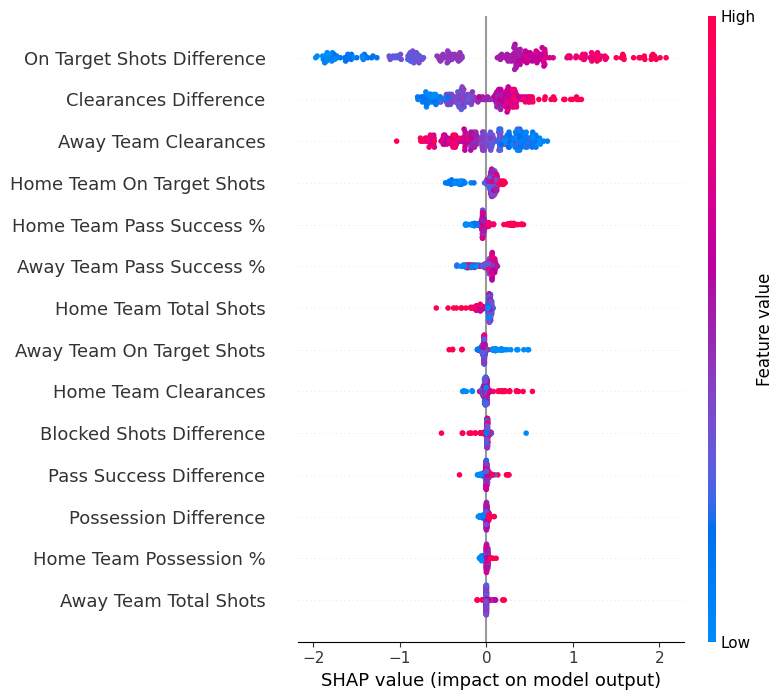

In [ ]:
# Use TreeExplainer for Gradient Boosting model
explainer = shap.TreeExplainer(grid_search_gb.best_estimator_)

# Shap for validation set
shap_values_val = explainer.shap_values(X_valid_std)
# shap_values_val is already a 2D array (samples x features)
shap.summary_plot(shap_values_val, X_valid_std, feature_names=feature_names)

# Shap for test set
shap_values_test = explainer.shap_values(X_test_std)
# shap_values_test is already a 2D array (samples x features)
shap.summary_plot(shap_values_test, X_test_std, feature_names=feature_names)

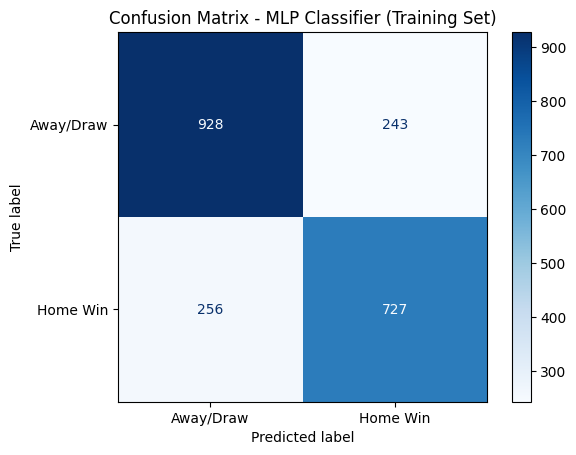

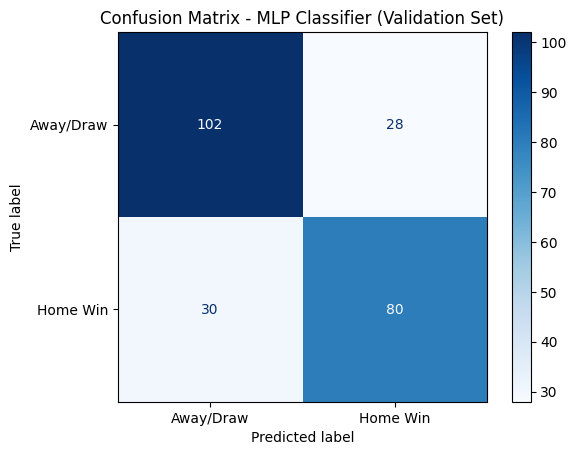

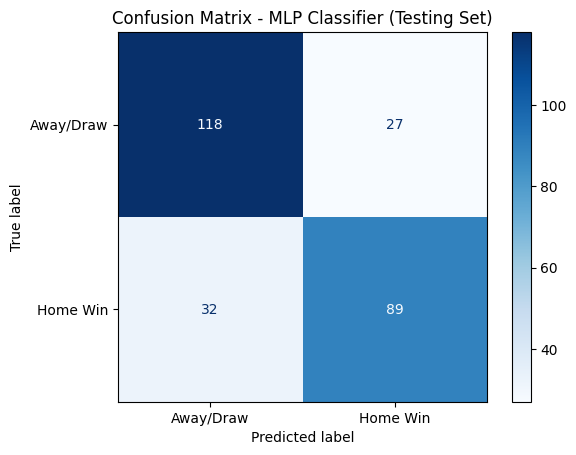

In [ ]:
# Confusion Matrix for MLP
display_labels = ['Away/Draw', 'Home Win']
ConfusionMatrixDisplay.from_predictions(
    y_train,
    y_predtrain_mlp,
    display_labels=display_labels,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix - MLP Classifier (Training Set)')
plt.show()

display_labels = ['Away/Draw', 'Home Win']
ConfusionMatrixDisplay.from_predictions(
    y_valid,
    y_predvalid_mlp,
    display_labels=display_labels,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix - MLP Classifier (Validation Set)')
plt.show()

display_labels = ['Away/Draw', 'Home Win']
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_predtest_mlp,
    display_labels=display_labels,
    cmap=plt.cm.Blues
)
plt.title('Confusion Matrix - MLP Classifier (Testing Set)')
plt.show()